# Click to go to respective testing heading

<a href = "# Testing with 0 to 7" >  fast 0 to 7 Test </a>


<a href = "#Total-Number-of-Images-in-each-folder" >Total number of images in each folder</a>

<a href = "#All-Accuracies" >All accuracies</a>

<a href = "#Ground-Truth-&-Classification-Result" >Ground truth and classification result</a>

In [16]:
import time
st = time.process_time() # for overall time calculation

import tensorflow as tf
import numpy as np
import os

In [17]:
model = tf.keras.models.load_model("MP.h5") # loading our pre-trained model

# Change path to dataset here ↓
img_dirs = [f"C:/Users/EMIL/Desktop/Test data 40x40/{i}" for i in range(8)]
img_dir_0, img_dir_1, img_dir_2, img_dir_3, img_dir_4, img_dir_5, img_dir_6, img_dir_7 = img_dirs

# Declaring images in each folder and their ground truth as a list  
image_list_0, image_list_1, image_list_2, image_list_3, image_list_4, image_list_5, image_list_6, image_list_7 = [os.listdir(dir) for dir in img_dirs]

gnd_trt_0, gnd_trt_1, gnd_trt_2, gnd_trt_3, gnd_trt_4, gnd_trt_5, gnd_trt_6, gnd_trt_7 = [i for i in range(8)]

In [18]:
def prediction(image_folder, image_list):
    pred = []

    # Loop through all the images in the folder and classify them
    for image_name in image_list:
    
        test_image = tf.keras.preprocessing.image.load_img(os.path.join(image_folder, image_name), target_size=(40, 40), color_mode='grayscale')
        test_image = np.expand_dims(test_image, axis=0) # Expand the dimensions of the image to match the input shape of the model
    
        result = model.predict(test_image)
    
        predicted_value = np.argmax(result[0])
    
        pred.append(predicted_value)
        
    return pred

In [19]:
def accuracy(gnd_trt, image_list, preds): # Accuracy calculation
    true_labels = [gnd_trt] * len(image_list)
    correct_predictions = sum(preds[i] == true_labels[i] for i in range(len(image_list)))
    accuracy_percent = (correct_predictions / len(true_labels)) * 100
    return accuracy_percent

# Testing with 0 to 7

In [20]:
preds_0 = prediction(img_dir_0, image_list_0)
preds_1 = prediction(img_dir_1, image_list_1)
preds_2 = prediction(img_dir_2, image_list_2)
preds_3 = prediction(img_dir_3, image_list_3)
preds_4 = prediction(img_dir_4, image_list_4)
preds_5 = prediction(img_dir_5, image_list_5)
preds_6 = prediction(img_dir_6, image_list_6)
preds_7 = prediction(img_dir_7, image_list_7)

1/1 [==============================] - 0s 50ms/step


## Total Number of Images in each folder

In [21]:
for i in range(8): # Hard coded, as we know the no of classes
    print(f"Total images in {i} : {len(locals()[f'image_list_{i}'])}")
    # locals() method returns a dictionary with all the local variables for the current program.

Total images in 0 : 525
Total images in 1 : 476
Total images in 2 : 539
Total images in 3 : 547
Total images in 4 : 467
Total images in 5 : 475
Total images in 6 : 453
Total images in 7 : 533


## All Accuracies

Accuracy of 0 : 84.95%
Accuracy of 1 : 91.81%
Accuracy of 2 : 92.21%
Accuracy of 3 : 59.60%
Accuracy of 4 : 97.64%
Accuracy of 5 : 62.95%
Accuracy of 6 : 88.52%
Accuracy of 7 : 83.49%


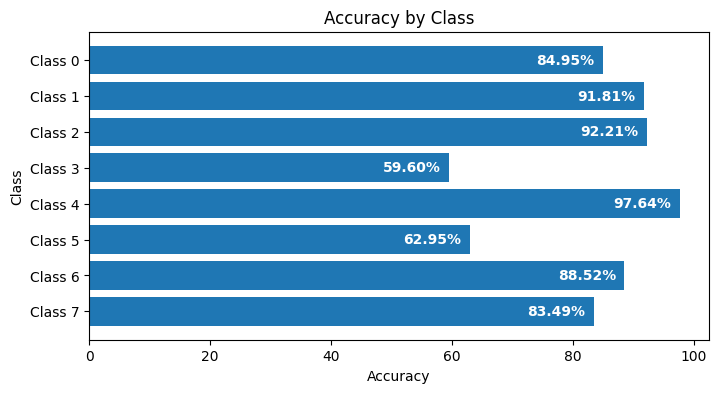

In [22]:
acc=[]

for i in range(8):
    print(f"Accuracy of {i} : {accuracy(locals()[f'gnd_trt_{i}'], locals()[f'image_list_{i}'], locals()[f'preds_{i}']):.2f}%")
    acc.append(accuracy(locals()[f'gnd_trt_{i}'], locals()[f'image_list_{i}'], locals()[f'preds_{i}']))


import matplotlib.pyplot as plt    

labels = [f'Class {i}' for i in range(8)]
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(labels, acc, align='center')

# Add axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Class')
ax.set_title('Accuracy by Class')

# Invert y-axis so that classes are listed from top to bottom
ax.invert_yaxis()

for i, acc in enumerate(acc):
    ax.text(acc -11, i, f'{acc:.2f}%', va='center',weight='bold',color='white')
# Show plot
plt.show()    

## Ground Truth & Classification Result

In [23]:
for i in range(8):
    print(f"Ground Truth: {locals()[f'gnd_trt_{i}']}\n\nClassified Values:\n{locals()[f'preds_{i}']}\n\n--------------------------------------------------------------------------------------------------------\n")

Ground Truth: 0

Classified Values:
[4, 0, 0, 0, 0, 0, 4, 4, 2, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0, 2, 4, 7, 4, 4, 0, 4, 0, 0, 4, 0, 0, 4, 4, 2, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 1, 6, 4, 0, 0, 4, 0, 0, 4, 0, 1, 0, 1, 0, 0, 4, 4, 4, 4, 0, 7, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
print(f"Total completion time: {((time.process_time() - st)/60):.2f} minutes")

Total completion time: 5.37 minutes


In [25]:
import numpy as np

# Initialize empty prediction arrays
pd = [[] for _ in range(8)]

# Loop over the classes
for i in range(8):
    # Get the length of the predictions for the current class
    pred_len = len(locals()[f'preds_{i}'])
    # Loop over the predictions and append the class label to the pd array
    for j in range(pred_len):
        pd[i].append(i)
    # Print the pd array and the corresponding ground truth for debugging
    print(pd[i])
    print(locals()[f'preds_{i}'])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
y_true = np.concatenate([pd[0],pd[1],pd[2],pd[3],pd[4],pd[5],pd[6],pd[7]])
y_pred = np.concatenate([preds_0,preds_1,preds_2,preds_3,preds_4,preds_5,preds_6,preds_7])

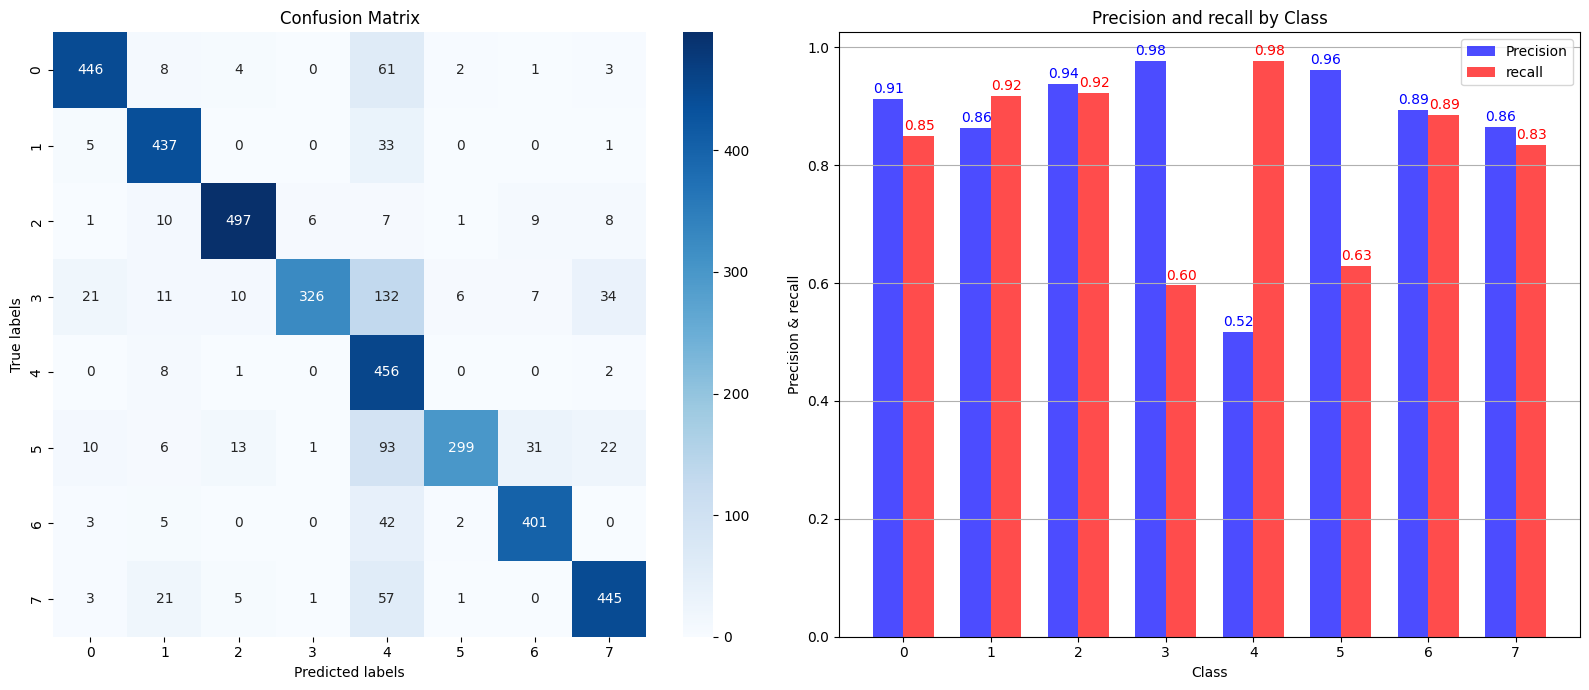

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Define class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7']

# Plot confusion matrix using seaborn heatmap
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax[0])
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].set_title('Confusion Matrix')

cm=conf_matrix
## using the confusion matrix to calculate the precision   and recall
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
accuracy = np.sum(np.diag(cm)) / np.sum(cm)


# Plot bar graph of precision and recall
bar_width = 0.35
bar_pos = np.arange(len(class_names))
ax[1].bar(bar_pos - bar_width/2, precision, width=bar_width, color='blue', alpha=0.7, label='Precision')
ax[1].bar(bar_pos + bar_width/2, recall, width=bar_width, color='red', alpha=0.7, label='Recall')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Precision & recall')
ax[1].set_title('Precision and recall by Class')
ax[1].grid(axis='y')
ax[1].legend(['Precision', 'recall'], loc='upper right')

# Annotate precision values
for i, v in enumerate(precision):
    ax[1].text(i - (bar_width/2)-0.17, v + 0.01, "{:.2f}".format(v), color='blue')

# Annotate recall values
for i, v in enumerate(recall):
    ax[1].text(i + (bar_width/2)-0.17, v + 0.01, "{:.2f}".format(v), color='red')
plt.tight_layout()
plt.show()


## End of test